# Kaggle Zillow Preprocessing v2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from sami_function import missing_ratio

%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/train_2016_v2.csv')
prop = pd.read_csv('../data/properties_2016.csv')
sample = pd.read_csv('../data/sample_submission.csv')

print(df_train.shape)
print(prop.shape)

df_train = pd.merge(df_train, prop, on='parcelid', how='left')
print(df_train.shape)

sample.rename(index=str, columns={'ParcelId': 'parcelid'}, inplace=True)
df_test = sample.merge(prop, on='parcelid', how='left')
print(df_test.shape)

print(set(list(df_train.columns)) - set(list(df_test.columns)))
print(set(list(df_test.columns)) - set(list(df_train.columns)))

/Users/Wes/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(90275, 3)
(2985217, 58)
(90275, 60)
(2985217, 64)
{'logerror', 'transactiondate'}
{'201712', '201610', '201710', '201612', '201611', '201711'}


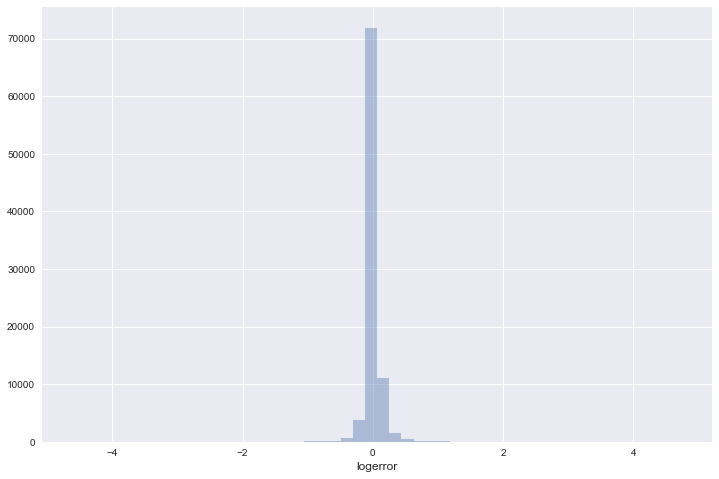

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(df_train.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [8]:
col_done = []

In [19]:
for c in df_train.columns:
    if df_train[c].dtype == 'object':
        if df_train[c].nunique() <= 3:         
            df_train[c] = df_train[c].map({True: 1, 'Y': 1})
            df_train[c] = df_train[c].fillna(0).astype(np.int8)
            col_done.append(c)
        if c == 'transactiondate':
            df_train[c] = pd.to_datetime(df_train[c])
            col_done.append(c)
        if c == 'propertycountylandusecode':
            df_train[c].fillna('023A', inplace =True)
            col_done.append(c)
        if c == 'propertyzoningdesc':
            df_train[c].fillna('UNIQUE', inplace =True)
            col_done.append(c)
        
    if df_train[c].dtype == 'float64':
        if c == 'logerror':
            ulimit = np.percentile(df_train[c].values, 99)
            llimit = np.percentile(df_train[c].values, 1)
            df_train.loc[df_train[c]>ulimit, [c]] = ulimit
            df_train.loc[df_train[c]<llimit, [c]] = llimit
            col_done.append(c)
            
        if c in ['taxamount', 'finishedsquarefeet6', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50']:
            df_train[c] = df_train[c].fillna(df_train[c].mean(axis=0))
            ulimit = np.percentile(df_train[c].values, 99.5)
            llimit = np.percentile(df_train[c].values, 0.5)
            df_train.loc[df_train[c]>ulimit, [c]] = ulimit
            df_train.loc[df_train[c]<llimit, [c]] = llimit
            col_done.append(c)
            
        if 'typeid' in c:
            df_train[c] = df_train[c].fillna(df_train[c].mode()[0]).astype(np.int8)
            col_done.append(c)
    

In [20]:
for c in [x for x in df_train.columns if x not in col_done]:
    if 'sqft' in c:
        print(c)

basementsqft
garagetotalsqft
yardbuildingsqft17
yardbuildingsqft26


In [21]:
for c in [x for x in df_train.columns if x not in col_done]:
    if 'cnt' in c:
        print(c)

bathroomcnt
bedroomcnt
fireplacecnt
fullbathcnt
garagecarcnt
poolcnt
roomcnt
unitcnt
structuretaxvaluedollarcnt
taxvaluedollarcnt
landtaxvaluedollarcnt


In [22]:
for c in [x for x in df_train.columns if x not in col_done]:
     if df_train[c].dtype == 'float64':
        print(str(c) + " : " 
                        + str(df_train[c].nunique()) + " - "
                        + str(df_train[c].isnull().sum()) + " - "
                        + str(df_train[c].dtype) + " - " 
                        #+ str(df_train[c].unique())
             )

basementsqft : 39 - 90232 - float64 - 
bathroomcnt : 23 - 0 - float64 - 
bedroomcnt : 17 - 0 - float64 - 
calculatedbathnbr : 22 - 1182 - float64 - 
finishedfloor1squarefeet : 1886 - 83419 - float64 - 
calculatedfinishedsquarefeet : 5102 - 661 - float64 - 
fips : 3 - 0 - float64 - 
fireplacecnt : 5 - 80668 - float64 - 
fullbathcnt : 14 - 1182 - float64 - 
garagecarcnt : 15 - 60338 - float64 - 
garagetotalsqft : 870 - 60338 - float64 - 
latitude : 73312 - 0 - float64 - 
longitude : 71900 - 0 - float64 - 
lotsizesquarefeet : 20016 - 10150 - float64 - 
poolcnt : 1 - 72374 - float64 - 
poolsizesum : 273 - 89306 - float64 - 
rawcensustractandblock : 42647 - 0 - float64 - 
regionidcity : 177 - 1803 - float64 - 
regionidcounty : 3 - 0 - float64 - 
regionidneighborhood : 494 - 54263 - float64 - 
regionidzip : 388 - 35 - float64 - 
roomcnt : 17 - 0 - float64 - 
threequarterbathnbr : 4 - 78266 - float64 - 
unitcnt : 10 - 31922 - float64 - 
yardbuildingsqft17 : 567 - 87629 - float64 - 
yardbuildi

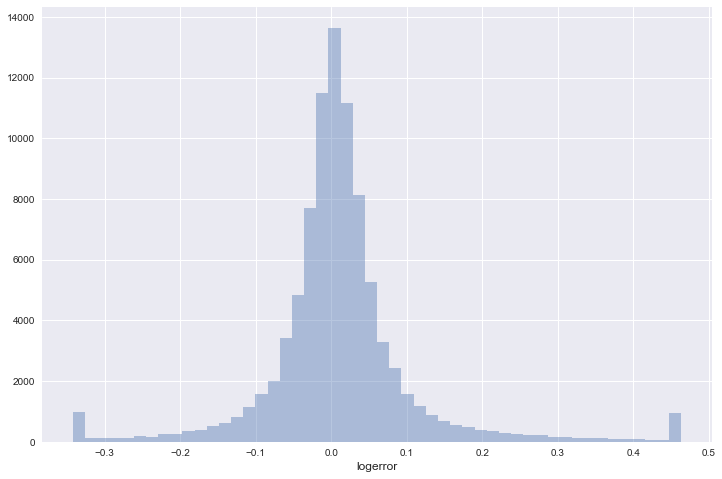

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(df_train.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [24]:
for c in df_train.columns:
    if df_train[c].dtype == 'object':
            print(str(c) + " : " 
                    + str(df_train[c].nunique()) + " - "
                    + str(df_train[c].isnull().sum()) + " - "
                    + str(df_train[c].dtype) + " - " 
                    #+ str(df_train[c].unique())
         )

propertycountylandusecode : 78 - 0 - object - 
propertyzoningdesc : 1997 - 0 - object - 


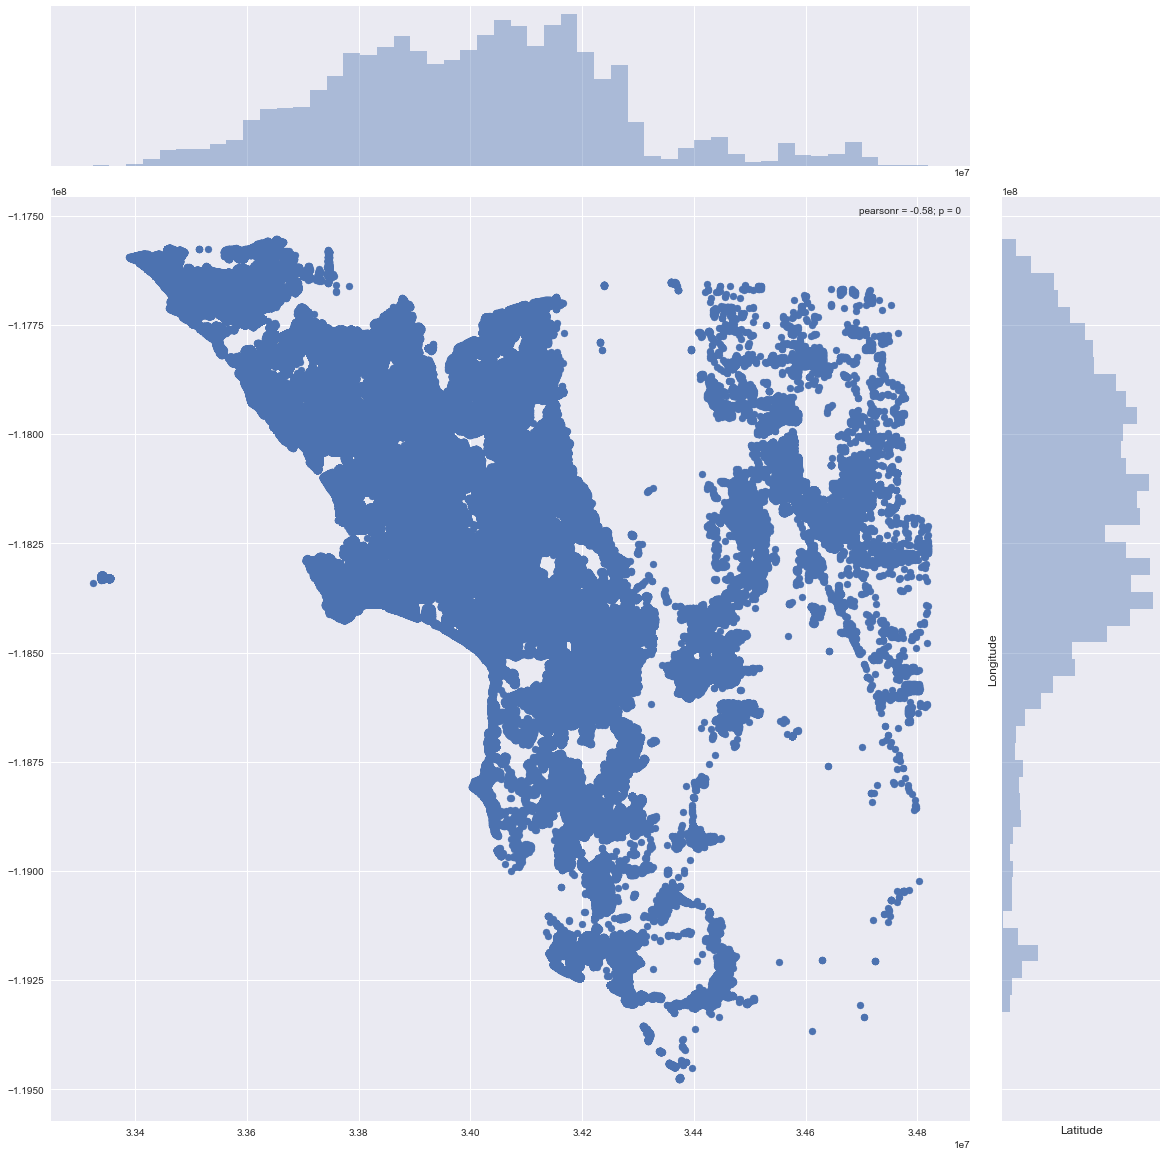

In [25]:
plt.figure(figsize=(16,16))
sns.jointplot(x=prop.latitude.values, y=prop.longitude.values, size=16)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

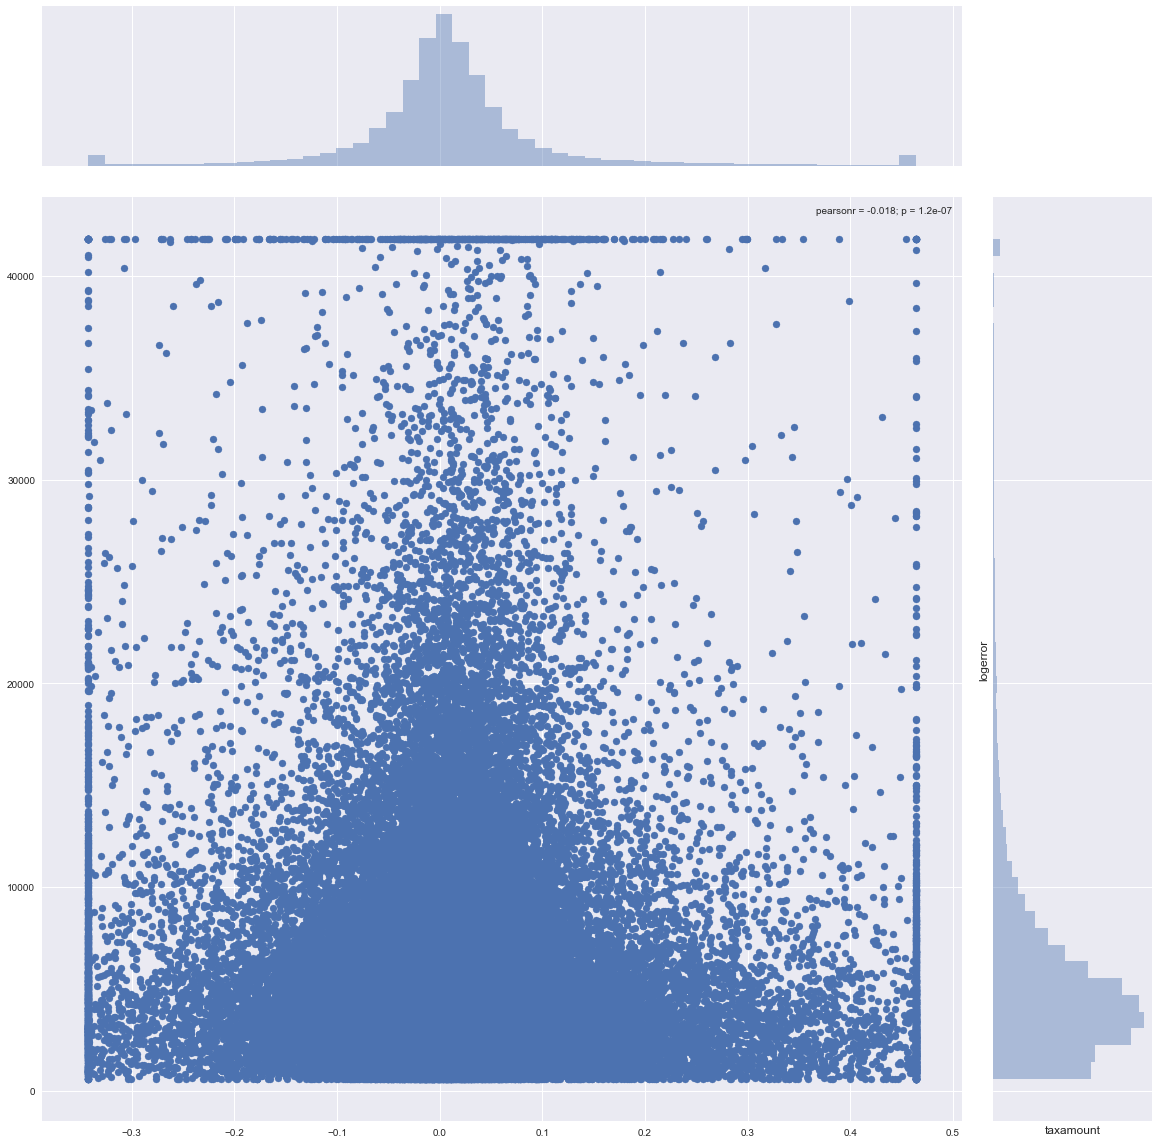

In [26]:
plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.logerror.values, y=df_train.taxamount.values, size=16)
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

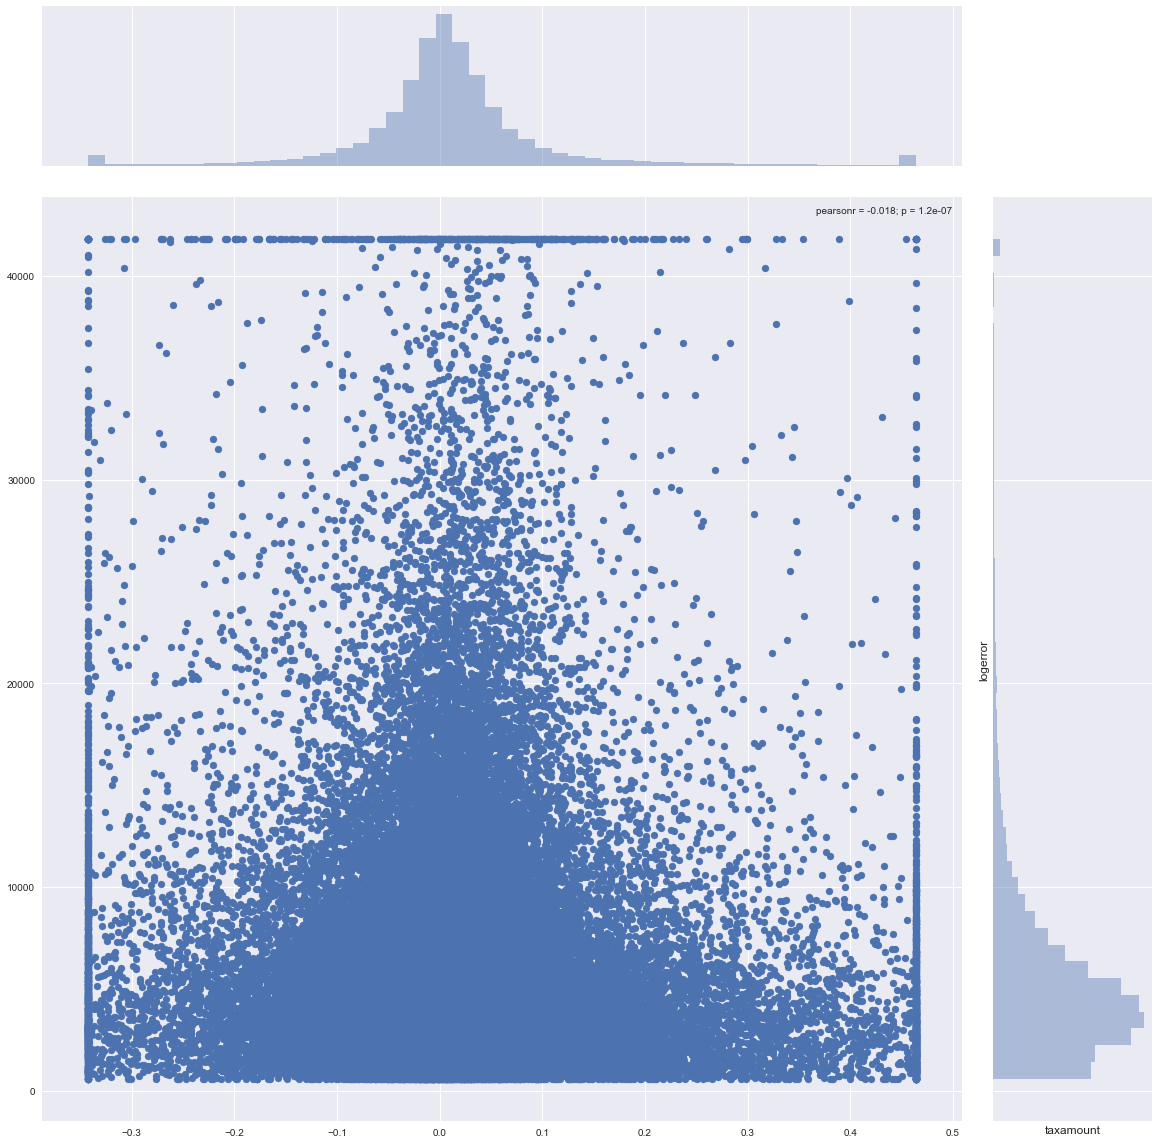

In [27]:
c = 'taxamount'
ulimit = np.percentile(df_train[c].values, 99.5)
llimit = np.percentile(df_train[c].values, 0.5)
df_train.loc[df_train[c]>ulimit, [c]] = ulimit
df_train.loc[df_train[c]<llimit, [c]] = llimit

plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.logerror.values, y=df_train.taxamount.values, size=16)
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

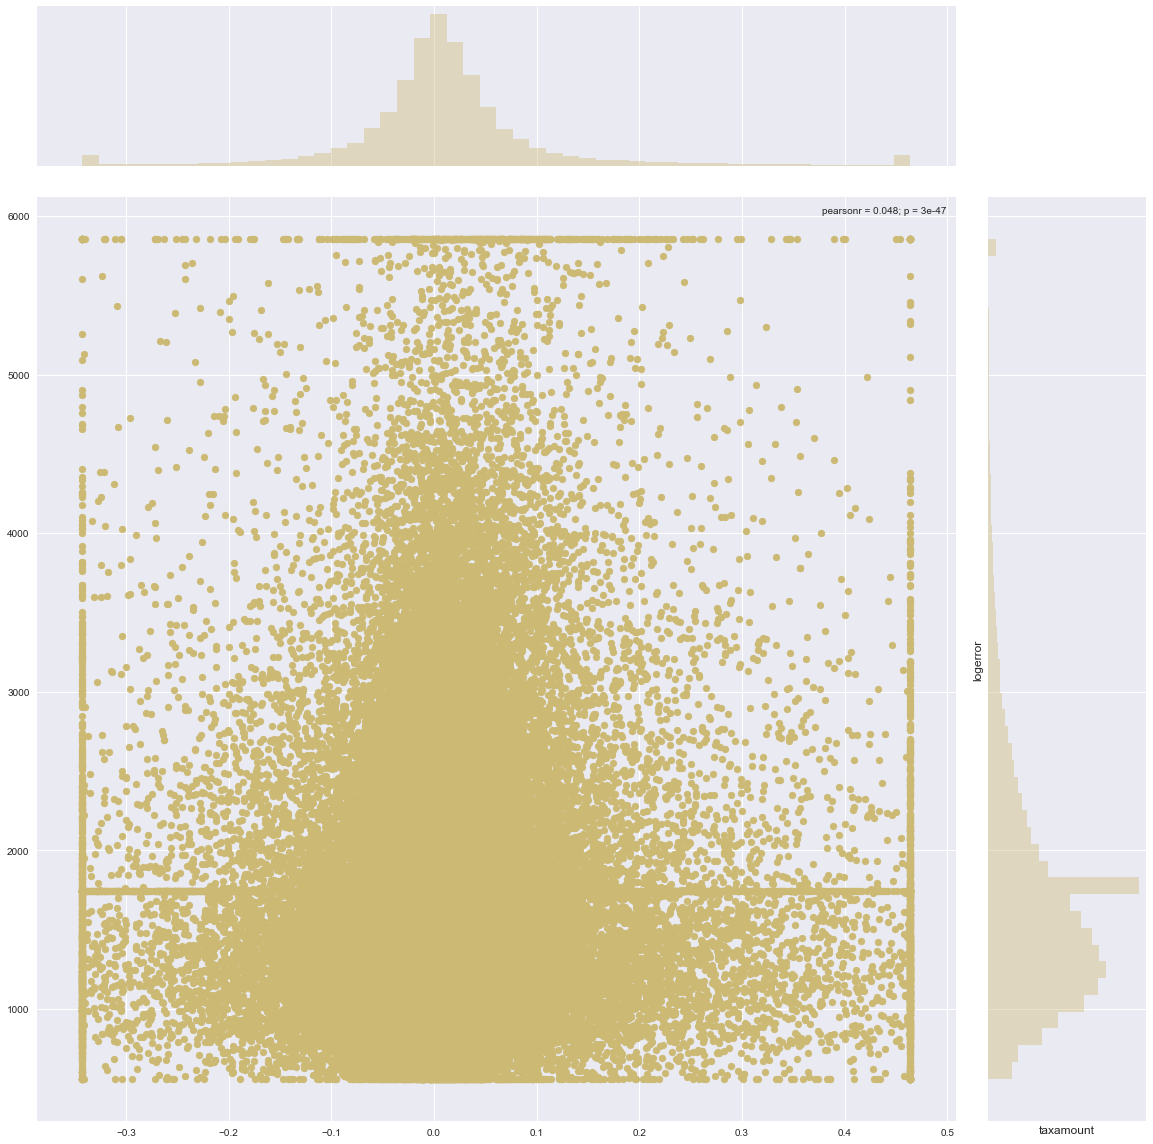

In [28]:
plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.logerror.values, y=df_train.finishedsquarefeet12.values, size=16, color=color[4])
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

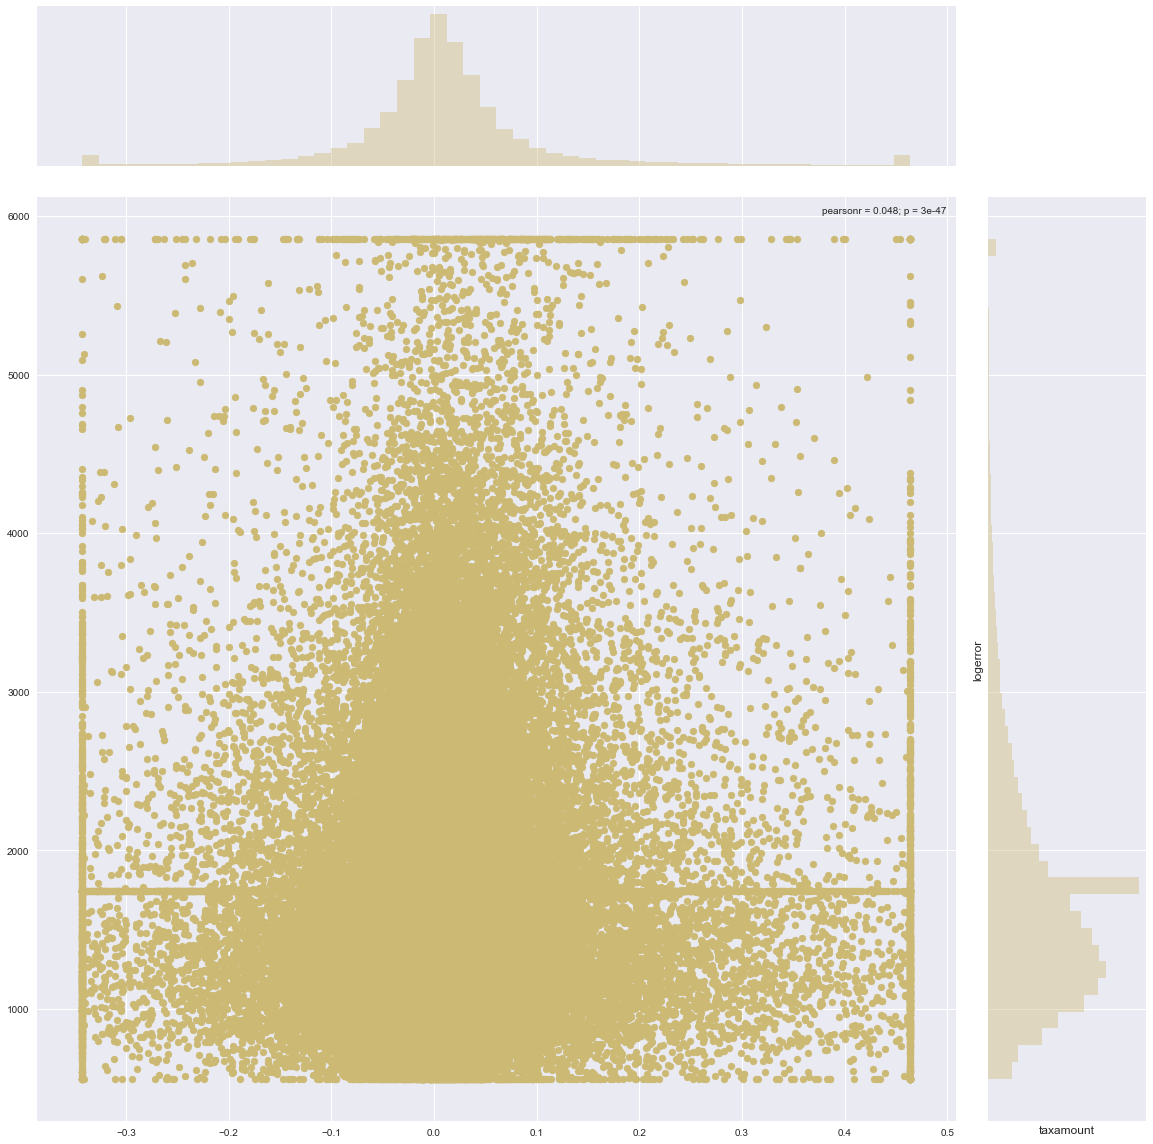

In [29]:
c = 'finishedsquarefeet12'
df_train[c] = df_train[c].fillna(df_train[c].mean(axis=0))

plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.logerror.values, y=df_train.finishedsquarefeet12.values, size=16, color=color[4])
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

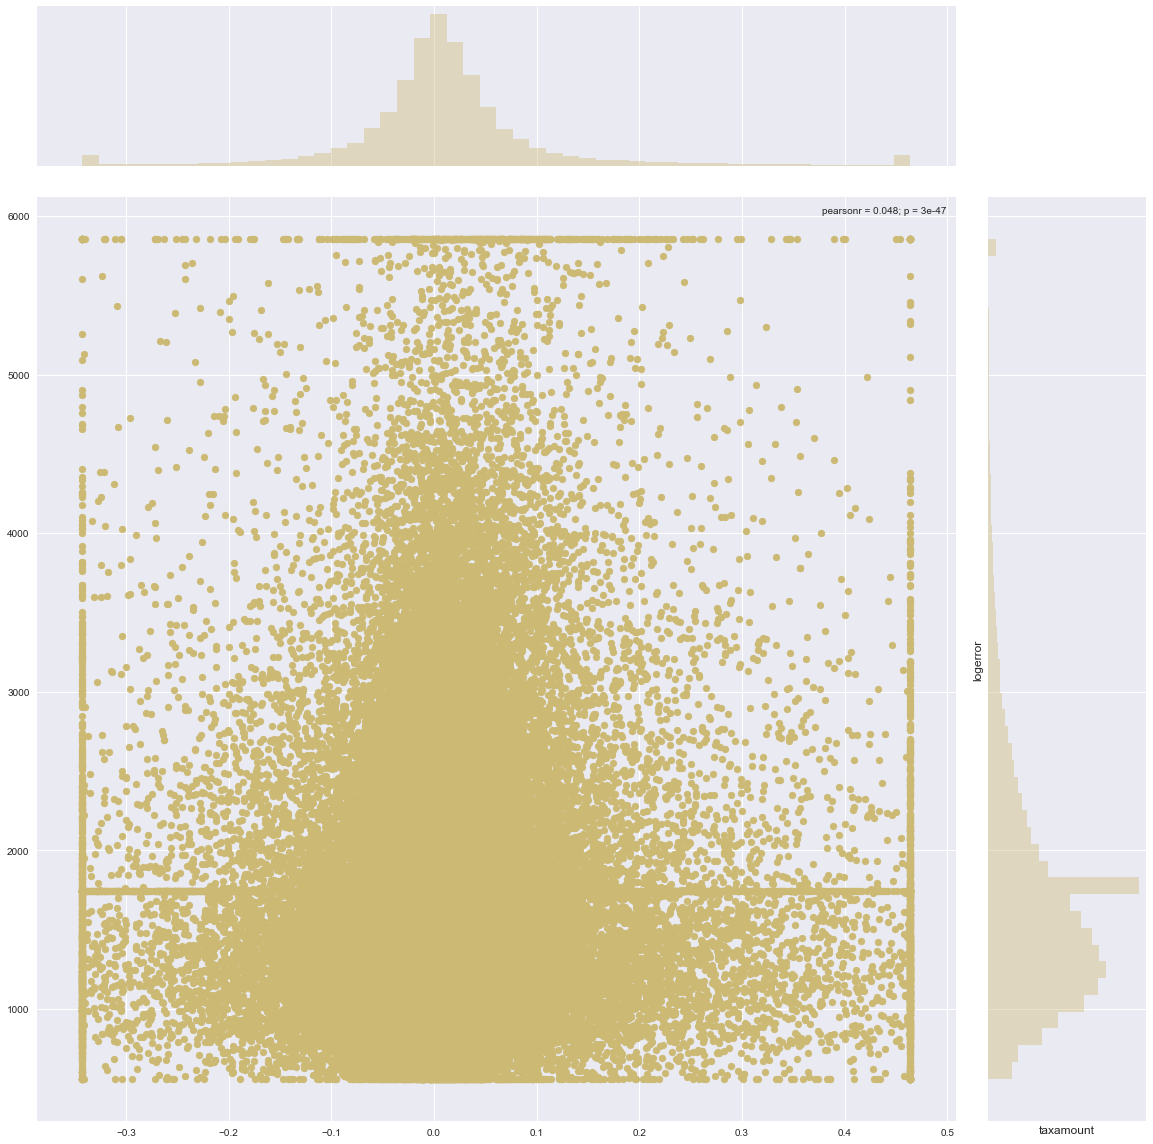

In [30]:
c = 'finishedsquarefeet12'
plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.logerror.values, y=df_train.finishedsquarefeet12.values, size=16, color=color[4])
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

5851.3969 560.0


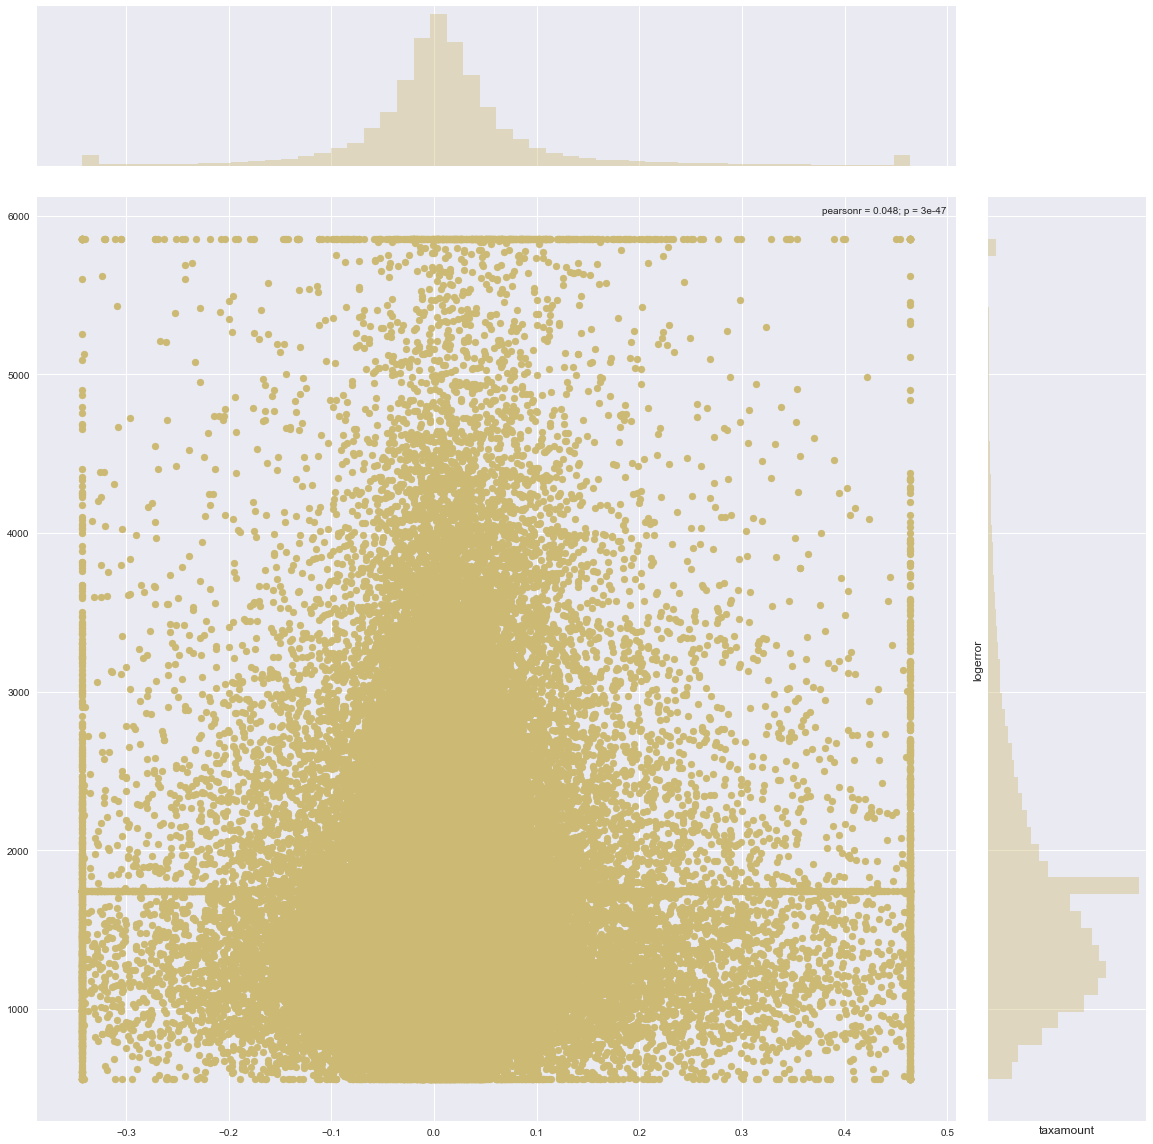

In [31]:


ulimit = np.percentile(df_train[c].values, 99.5)
llimit = np.percentile(df_train[c].values, 0.5)
print(ulimit, llimit)
df_train.loc[df_train[c]>ulimit, [c]] = ulimit
df_train.loc[df_train[c]<llimit, [c]] = llimit

plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.logerror.values, y=df_train.finishedsquarefeet12.values, size=16, color=color[4])
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

In [32]:
df_train['basementsqft'].unique()

array([   nan,   814.,   330.,   168.,   671.,  1555.,  1528.,   771.,
         700.,   831.,  1048.,  1312.,   690.,   564.,   198.,   676.,
         184.,   540.,   260.,   557.,   312.,   913.,  1350.,   802.,
         162.,   616.,  1551.,   485.,   238.,   493.,   760.,   515.,
         196.,   585.,   234.,   510.,   579.,   100.,   608.,  1210.])

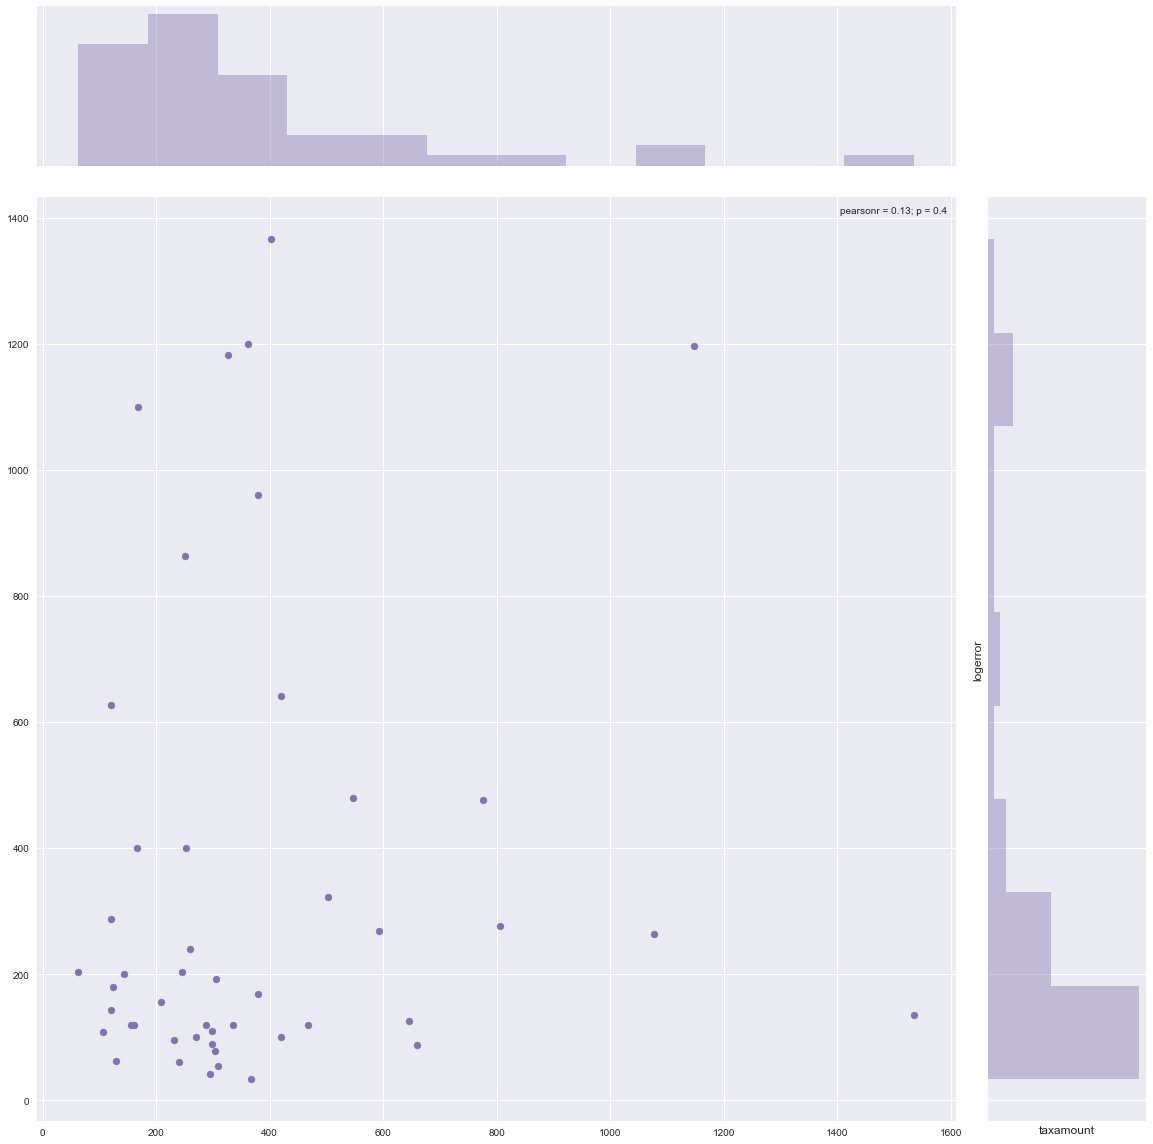

In [33]:
plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.yardbuildingsqft17.values, y=df_train.yardbuildingsqft26.values, size=16, color=color[3])
plt.ylabel('logerror', fontsize=12)
plt.xlabel('taxamount', fontsize=12)
plt.show()

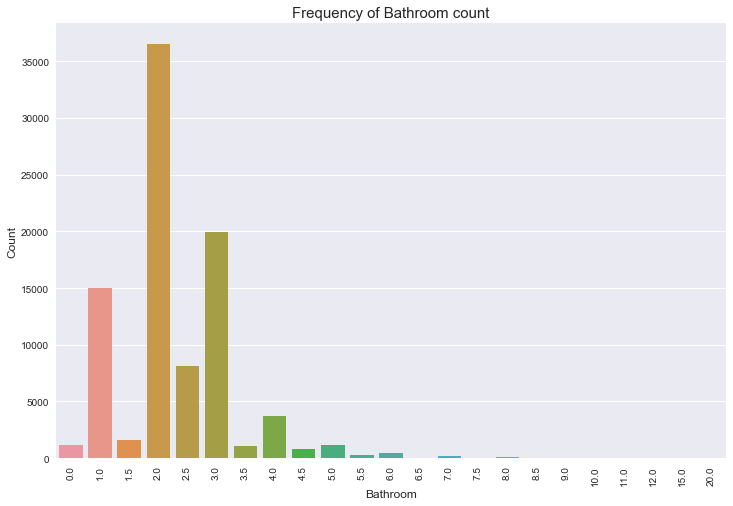

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=df_train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

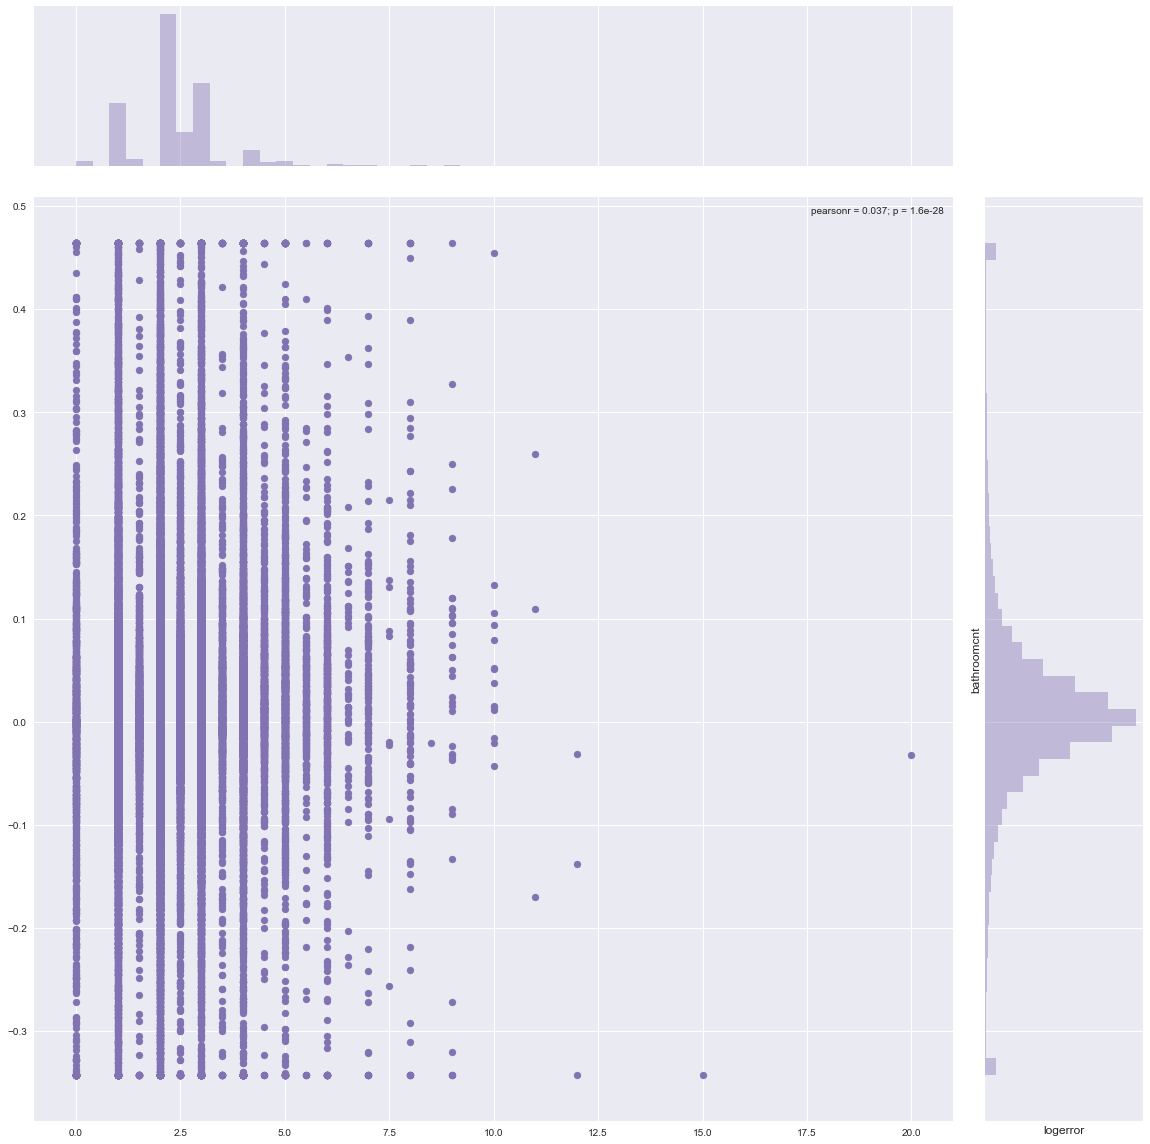

In [35]:
plt.figure(figsize=(16,16))
sns.jointplot(x=df_train.bathroomcnt.values, y=df_train.logerror.values, size=16, color=color[3])
plt.ylabel('bathroomcnt', fontsize=12)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [64]:
corr_mat = df_train.corr()
corr_mat['bathroomcnt'].sort_values(ascending=False)[:10]

calculatedbathnbr               1.000000
bathroomcnt                     1.000000
fullbathcnt                     0.984130
finishedsquarefeet12            0.799372
calculatedfinishedsquarefeet    0.772553
bedroomcnt                      0.646120
finishedsquarefeet15            0.633631
structuretaxvaluedollarcnt      0.586641
garagecarcnt                    0.502429
finishedfloor1squarefeet        0.477264
Name: bathroomcnt, dtype: float64

In [60]:
df_train.bathroomcnt.unique()

array([  2. ,   3.5,   3. ,   2.5,   4. ,   1. ,   5. ,   5.5,   1.5,
         8. ,   0. ,   4.5,   9. ,   7. ,   6. ,  10. ,   6.5,   7.5,
        12. ,  11. ,  20. ,   8.5,  15. ])

In [61]:
df_train[df_train.bathroomcnt.isnull()][['bathroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12']]

,bathroomcnt,calculatedbathnbr,fullbathcnt,calculatedfinishedsquarefeet,finishedsquarefeet12


In [63]:
df_train.bathroomcnt.describe()

count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64

## Preprocessing

In [3]:
from zillow_functions import create_newFeatures, data_preprocessing, memory_reduce

In [4]:
df_train = data_preprocessing(df_train)

In [5]:
df_train = create_newFeatures(df_train)

In [6]:
df_train.dtypes

parcelid                              int64
logerror                            float64
airconditioningtypeid               float64
architecturalstyletypeid            float64
basementsqft                        float64
bathroomcnt                         float64
bedroomcnt                          float64
buildingclasstypeid                 float64
buildingqualitytypeid               float64
calculatedbathnbr                   float64
finishedfloor1squarefeet            float64
calculatedfinishedsquarefeet        float64
finishedsquarefeet12                float64
finishedsquarefeet13                float64
finishedsquarefeet15                float64
finishedsquarefeet50                float64
finishedsquarefeet6                 float64
fips                                float64
fireplacecnt                        float64
fullbathcnt                         float64
garagecarcnt                        float64
garagetotalsqft                     float64
hashottuborspa                  

In [7]:
df_train = memory_reduce(df_train)

Initial size 43.82 MB
There are 0 columns that cannot be reduced
There are 75 columns reduced
Final size 14.46 MB


In [8]:
df_train.dtypes

parcelid                              int32
logerror                            float16
airconditioningtypeid               float16
architecturalstyletypeid            float16
basementsqft                        float16
bathroomcnt                         float16
bedroomcnt                          float16
buildingclasstypeid                 float16
buildingqualitytypeid               float16
calculatedbathnbr                   float16
finishedfloor1squarefeet            float16
calculatedfinishedsquarefeet        float16
finishedsquarefeet12                float16
finishedsquarefeet13                float16
finishedsquarefeet15                float16
finishedsquarefeet50                float16
finishedsquarefeet6                 float16
fips                                float16
fireplacecnt                        float16
fullbathcnt                         float16
garagecarcnt                        float16
garagetotalsqft                     float16
hashottuborspa                  

In [20]:
df_train[['censustractandblock', 'rawcensustractandblock']].head()

,censustractandblock,rawcensustractandblock
0,6.037107e+13,122
1,NaN,-68
2,6.037464e+13,110
3,6.037296e+13,-29
4,6.059042e+13,87


In [10]:
missing_ratio(df_train, plot=False)

,Missing Ratio


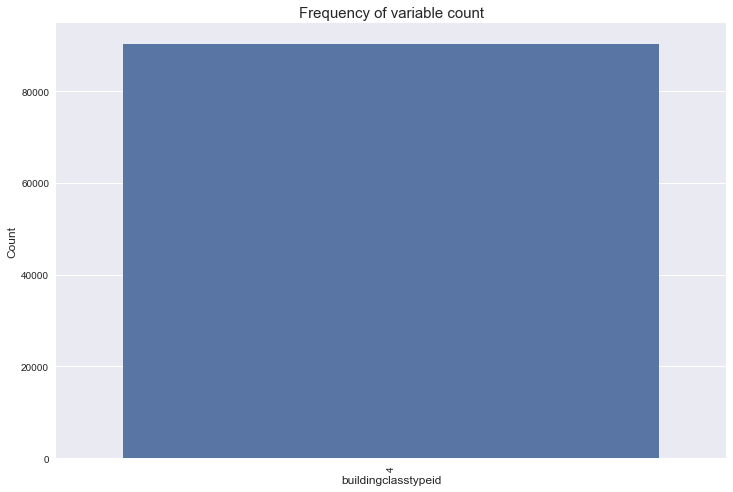

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x="buildingclasstypeid", data=df_train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('buildingclasstypeid', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of variable count", fontsize=15)
plt.show()

In [11]:
x_train = df_train.drop(['parcelid', 'logerror'], axis=1)
y_train = df_train['logerror'].values
x_col = list(x_train.columns)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(lr)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0)

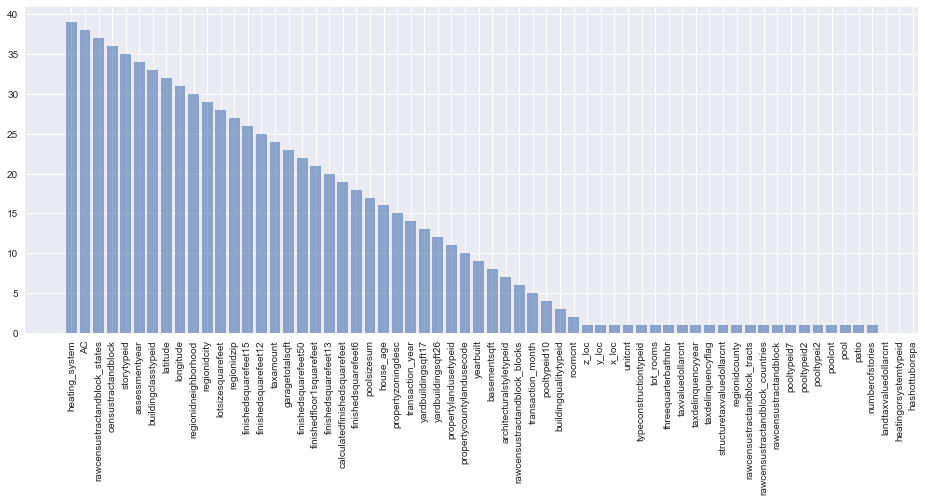

In [13]:
plt.figure(figsize=(16, 6))

y_val = [x[0] for x in [x for x in sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x_col), reverse=True) if x[0] > 0]]
x_val = [x[1] for x in [x for x in sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), x_col), reverse=True) if x[0] > 0]]

x = np.array(range(len(x_val)))
plt.xticks(x, x_val, rotation=90)
plt.bar(x[:60], y_val[:60], align='center', alpha=0.6)
plt.show()

### Create special fearure

In [18]:
from sklearn import linear_model

In [ ]:
def creature_special_feature(X, y):
    reg = linear_model.LinearRegression()
    reg.fit (X, y)
    return reg.pred(X), reg

In [35]:
sx_train = x_train[['transaction_year', 'transaction_month', 'yearbuilt', 'house_age']]
sx_train.head(5)

,transaction_year,transaction_month,yearbuilt,house_age
0,1970,1,1959,11
1,1970,1,2014,-44
2,1970,1,1940,30
3,1970,1,1987,-17
4,1970,1,1981,-11


In [ ]:
df['transaction_year'].astype(np.int16) - dataframe['yearbuilt'].astype(np.int16)

In [22]:
df_train.transactiondate.dt.year

0        1970
1        1970
2        1970
3        1970
4        1970
5        1970
6        1970
7        1970
8        1970
9        1970
10       1970
11       1970
12       1970
13       1970
14       1970
15       1970
16       1970
17       1970
18       1970
19       1970
20       1970
21       1970
22       1970
23       1970
24       1970
25       1970
26       1970
27       1970
28       1970
29       1970
         ... 
90245    1970
90246    1970
90247    1970
90248    1970
90249    1970
90250    1970
90251    1970
90252    1970
90253    1970
90254    1970
90255    1970
90256    1970
90257    1970
90258    1970
90259    1970
90260    1970
90261    1970
90262    1970
90263    1970
90264    1970
90265    1970
90266    1970
90267    1970
90268    1970
90269    1970
90270    1970
90271    1970
90272    1970
90273    1970
90274    1970
Name: transactiondate, Length: 90275, dtype: int64

In [17]:
reg = linear_model.LinearRegression()
reg.fit (sx_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
pred = reg.predict(sx_train)

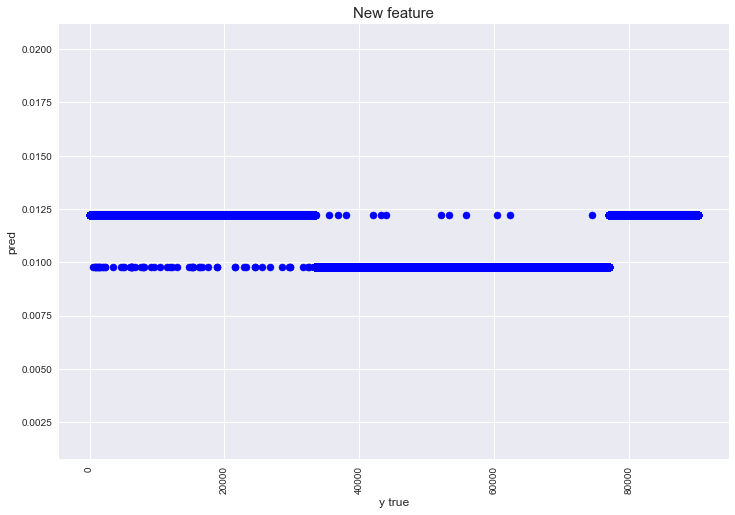

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(np.array(range(len(pred))), pred, color="blue", linewidth=0.5)
plt.ylabel('pred', fontsize=12)
plt.xlabel('y true', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("New feature", fontsize=15)
plt.show()